In [22]:
import numpy as np
import matplotlib.pyplot as plt

## Datset tasks

### Load the dataset

Download the data csv file from [this link](https://drive.google.com/file/d/1QLvpwOV9VJL98BBSYSe1TYUuIxw7i9kH). Read about the dataset [here](https://samyzaf.com/ML/song_year/song_year.html) (we will use a reduced version of the dataset).

#### Downloading the dataset

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
# path_to_csv = '/content/drive/MyDrive/Universidad/robocosas/ml/lab1/YearPredictionMSD.csv'
path_to_csv = 'YearPredictionMSD.csv'

In [25]:
import pandas as pd
# Load the data from the file
data = pd.read_csv(path_to_csv)
# we shuffle the data
data = data.sample(frac=1.0, random_state = 0).reset_index(drop = True)

#### Normalize the data

In [26]:
cols = data.columns.difference(['0'])
# normalize only selected columns
data[cols] = (data[cols]-data[cols].min())/(data[cols].max()-data[cols].min())

In [27]:
data

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2006,0.615036,0.391858,0.411534,0.408236,0.301982,0.333017,0.567195,0.378089,0.564376,...,0.438279,0.554983,0.290990,0.474257,0.451836,0.680394,0.513661,0.497179,0.546954,0.455799
1,1987,0.737415,0.386847,0.546292,0.445003,0.378160,0.303599,0.542302,0.336871,0.622867,...,0.414847,0.547103,0.335404,0.476707,0.516178,0.679153,0.531905,0.500645,0.547860,0.469891
2,1963,0.702921,0.396784,0.563589,0.426636,0.173114,0.323771,0.511341,0.372964,0.660235,...,0.421968,0.691986,0.350531,0.495068,0.572462,0.702980,0.521432,0.543080,0.544091,0.483278
3,2006,0.801228,0.517800,0.451835,0.360711,0.284651,0.302908,0.571447,0.390017,0.546920,...,0.427393,0.538326,0.321987,0.495367,0.502220,0.667674,0.510310,0.514190,0.554395,0.456039
4,2009,0.856466,0.455807,0.547046,0.448812,0.295679,0.264328,0.570042,0.362260,0.604327,...,0.433720,0.574009,0.307350,0.490673,0.527519,0.664875,0.486473,0.518336,0.543523,0.438555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2004,0.781147,0.441660,0.408978,0.492676,0.346120,0.237380,0.610857,0.287851,0.656942,...,0.462552,0.583276,0.397730,0.505798,0.542989,0.608800,0.584717,0.498967,0.528551,0.464636
49996,1989,0.762910,0.440276,0.527015,0.385715,0.263294,0.273469,0.554453,0.369435,0.541303,...,0.425038,0.554098,0.343037,0.465451,0.512820,0.664295,0.546303,0.525478,0.553199,0.520947
49997,2002,0.868387,0.582434,0.549178,0.422410,0.198680,0.209186,0.643144,0.421435,0.674112,...,0.426244,0.581425,0.323985,0.492759,0.517017,0.664836,0.511781,0.511355,0.545338,0.453306
49998,2006,0.815856,0.438208,0.574267,0.420185,0.266862,0.222682,0.599449,0.407267,0.607967,...,0.483023,0.570257,0.310659,0.477884,0.511646,0.656984,0.511468,0.505375,0.539339,0.475712


### Analyze the dataset

#### Distribution report

As we can see, the dataset doesn't have a great distribution of songs over the years. This isn't necessarily problematic, but can lead to biases in the classification.

<Axes: >

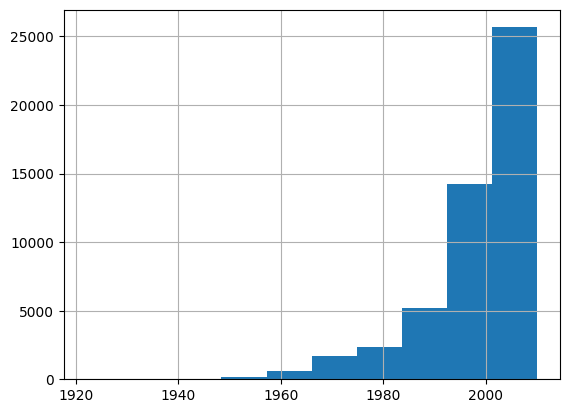

In [28]:
data['0'].hist()

### Correlation report

We can print the correlations between each feature with the others.

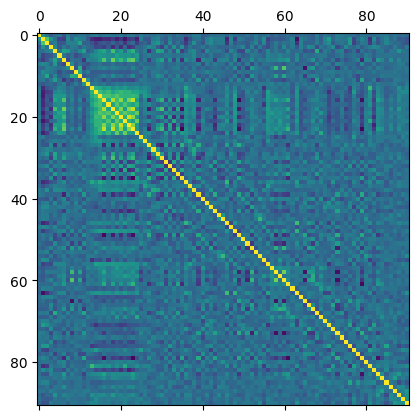

In [29]:
plt.matshow(data.corr())
plt.show()

This doesn't add much to our understanding of the dataset, so let's see what is the correlation between the output (year) and the rest of the inputs (features).

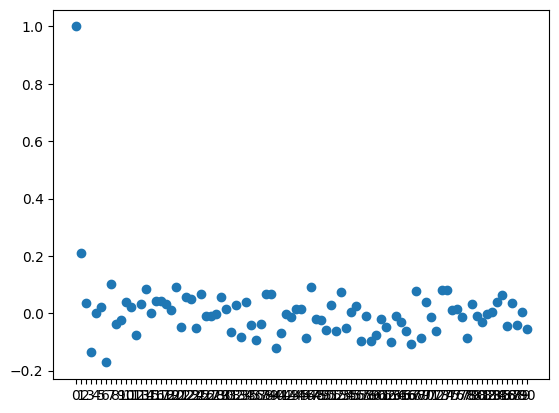

In [30]:
plt.scatter(y=data.corr()['0'], x=data.columns)

As we can see, most of the features present on the dataset have from little to none correlation with the release year of the song.

### Splitting the data

We split the data into train, validation and test.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = data.to_numpy()[:,1:]
y = data.to_numpy()[:,0]

In [33]:
# Split into (train+val) and (test) from the og dataset with 0.1 ratio
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)
# Split into (train) and (val) from the (train+val) dataset with 0.1 ratio
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.1, random_state=2)

#### Sizes report

In [34]:
print(f'The size of the total dataset is {X.shape[0]}')
print(f'The size of the training dataset is {X_train.shape[0]}')
print(f'The size of the validation dataset is {X_val.shape[0]}')
print(f'The size of the test dataset is {X_test.shape[0]}')
print(f'There is a total of {X.shape[1]} features')

The size of the total dataset is 50000
The size of the training dataset is 40500
The size of the validation dataset is 4500
The size of the test dataset is 5000
There is a total of 90 features


## Training different models

We'll train different models and compare their performance based on the following metrics:
- Mean Absolute Error (MAE): the average absolute difference between the predicted and the actual values.
- Mean Squared Error (MSE): the average squared difference between the predicted and the actual values.
- Median Absolute Error (MedAE): the median of the absolute difference between the predicted and the actual values.

This will give us a good idea of how well the model is performing by giving us a general idea of the error (we want all these values to be as low as possible).

### Linear models

#### Linear regression

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, median_absolute_error, mean_absolute_error

# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

# Predict outputs for the validation set
y_val_pred = lr.predict(X_val)

# Report metrics in the validation set
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
medae = median_absolute_error(y_val, y_val_pred)
print('MSE Linear Regression, validation set: ', mse)
print('MAE Linear Regression, validation set: ', mae)
print('MedAE Linear Regression, validation set: ', medae)

MSE Linear Regression, validation set:  90.55269051397096
MAE Linear Regression, validation set:  6.721928001948276
MedAE Linear Regression, validation set:  4.859420441814677


As we can see, the linear regression model performs poorly on the dataset with all the metrics being very high.

#### Huber

Huber is a linear regression model that is robust to outliers. It combines the best properties of the least squares and least absolute deviation loss functions by being strongly convex when close to the target/minimum and less steep for extreme values.

In [36]:
# Fit a Huber regression model
huber = linear_model.HuberRegressor(max_iter=1000)
huber.fit(X_train,y_train)

# Predict outputs for the validation set
y_val_pred = huber.predict(X_val)

# Report metrics in the validation set
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
medae = median_absolute_error(y_val, y_val_pred)
print('MSE Huber, validation set: ', mse)
print('MAE Huber, validation set: ', mae)
print('MedAE Huber, validation set: ', medae)

MSE Huber, validation set:  95.07245850714267
MAE Huber, validation set:  6.44899675177285
MedAE Huber, validation set:  4.250038583397327


#### RANSAC

Using RANSAC we can fit a regression model to a data set that contains outliers. It works by iteratively selecting random samples from the original data and checking if they fit the model. The samples that fit the model are then used to train the final model.

In [37]:
# Fit a RANSAC regression model
ransac = linear_model.RANSACRegressor()
ransac.fit(X_train,y_train)

# Predict outputs for the validation set
y_val_pred = ransac.predict(X_val)

# Report metrics in the validation set
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
medae = median_absolute_error(y_val, y_val_pred)
print('MSE RANSAC, validation set: ', mse)
print('MAE RANSAC, validation set: ', mae)
print('MedAE RANSAC, validation set: ', medae)

MSE RANSAC, validation set:  2350.4769701953765
MAE RANSAC, validation set:  33.670550436661294
MedAE RANSAC, validation set:  24.063283133975347


#### Ridge

Ridge regression is a linear regression model that uses L2 regularization to prevent overfitting. It works by adding a penalty term to the loss function that is proportional to the sum of the squared value of the coefficients.

In [17]:
# Fit a Ridge regression model
ridge = linear_model.Ridge()
ridge.fit(X_train,y_train)

# Predict outputs for the validation set
y_val_pred = ridge.predict(X_val)

# Report metrics in the validation set
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
medae = median_absolute_error(y_val, y_val_pred)
print('MSE Linear Regression, validation set: ', mse)
print('MAE Linear Regression, validation set: ', mae)
print('MedAE Linear Regression, validation set: ', medae)

MSE Linear Regression, validation set:  90.56311671116997
MAE Linear Regression, validation set:  6.720179026998471
MedAE Linear Regression, validation set:  4.866853015491188


### Polynomial

A polynomial regression model works in a similar way to a linear regression model, but it uses a polynomial function to fit the data instead of a linear function so we can expect it to perform better than the linear regression model (but it will also be more prone to overfitting).

##### Degree 2

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
poly_degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree=poly_degree), linear_model.LinearRegression())

# Fit the polynomial regression model
polyreg.fit(X_train, y_train)

# Predict outputs for the validation set
y_val_pred = polyreg.predict(X_val)

# Report metrics in the validation set
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
medae = median_absolute_error(y_val, y_val_pred)
print('MSE Polynomial Regression (Degree {}), validation set: '.format(poly_degree), mse)
print('MAE Polynomial Regression (Degree {}), validation set: '.format(poly_degree), mae)
print('MedAE Polynomial Regression (Degree {}), validation set: '.format(poly_degree), medae)


MSE Polynomial Regression (Degree 2), validation set:  117.3797615230778
MAE Polynomial Regression (Degree 2), validation set:  7.120587343049544
MedAE Polynomial Regression (Degree 2), validation set:  4.969689699929177


The results here are somewhat worse than the linear regression model. We'll try to increase the degree of the polynomial to see if we can get better results (this will of course increase the complexity of the model and therefore the training time).

##### Degree 3

If we try to increase the degree of the polynomial to 3, we can see that the training time increases significantly and the results are still worse than the linear regression model. Also, the training process causes the program to crash due to memory issues. To avoid this, we'll use PCA to reduce the number of features.

In [38]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Create PCA object with 50 components
pca = PCA(n_components=50)

# Fit PCA to X_train
pca.fit(X_train)

print(f"PCA was fitted to {pca.n_components_} components")
# Transform X_train and X_val using PCA
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

# Create polynomial features
poly_degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())

# Fit the polynomial regression model
polyreg.fit(X_train_pca, y_train)

# Predict outputs for the validation set
y_val_pred = polyreg.predict(X_val_pca)

# Report metrics in the validation set
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
medae = median_absolute_error(y_val, y_val_pred)
print('MSE Polynomial Regression (Degree {}), validation set: '.format(poly_degree), mse)
print('MAE Polynomial Regression (Degree {}), validation set: '.format(poly_degree), mae)
print('MedAE Polynomial Regression (Degree {}), validation set: '.format(poly_degree), medae)

MSE Polynomial Regression (Degree 3), validation set:  26591.416718318516
MAE Polynomial Regression (Degree 3), validation set:  30.28147092013889
MedAE Polynomial Regression (Degree 3), validation set:  9.65625


### Nearest Neighbors

Nearest Neighbors is a non-parametric method used for classification and regression. It works by finding the closest training examples in the feature space and using them to predict the value of a new data point.

In [40]:
from sklearn.neighbors import KNeighborsRegressor
# Fit a NN model
nn = KNeighborsRegressor(n_neighbors=5)
nn.fit(X_train,y_train)

# Predict outputs for the validation set
y_val_pred = nn.predict(X_val)

# Report metrics in the validation set
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
medae = median_absolute_error(y_val, y_val_pred)
print('MSE Nearest Neighbors, validation set: ', mse)
print('MAE Nearest Neighbors, validation set: ', mae)
print('MedAE Nearest Neighbors, validation set: ', medae)

MSE Nearest Neighbors, validation set:  80.08068444444444
MAE Nearest Neighbors, validation set:  6.206622222222225
MedAE Nearest Neighbors, validation set:  4.2000000000000455


### Decision Trees

Given that linear models don't seem to work well on this dataset, we'll try to use decision based models to see if we can get better results.

#### Trees

Decision trees are a non-parametric supervised learning method used for classification and regression. They work by splitting the feature space into smaller and smaller regions until they are able to fit the data.

In [41]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Predict outputs for the validation set using Decision Tree
y_val_pred_dt = decision_tree.predict(X_val)

# Report metrics in the validation set for Decision Tree
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
mae_dt = mean_absolute_error(y_val, y_val_pred_dt)
medae_dt = median_absolute_error(y_val, y_val_pred_dt)
print('\nMSE Decision Tree, validation set: ', mse_dt)
print('MAE Decision Tree, validation set: ', mae_dt)
print('MedAE Decision Tree, validation set: ', medae_dt)


MSE Decision Tree, validation set:  182.55533333333332
MAE Decision Tree, validation set:  9.178888888888888
MedAE Decision Tree, validation set:  6.0


#### Random Forests

Random forests are an ensemble learning method that uses decision trees as base estimators. They work by training a number of decision tree classifiers on various sub-samples of the dataset and using averaging to improve the predictive accuracy and control over-fitting.

In [42]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)

# Predict outputs for the validation set using Random Forest
y_val_pred_rf = random_forest.predict(X_val)

# Report metrics in the validation set for Random Forest
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
medae_rf = median_absolute_error(y_val, y_val_pred_rf)
print('\nMSE Random Forest, validation set: ', mse_rf)
print('MAE Random Forest, validation set: ', mae_rf)
print('MedAE Random Forest, validation set: ', medae_rf)


MSE Random Forest, validation set:  84.53189968888886
MAE Random Forest, validation set:  6.620573333333333
MedAE Random Forest, validation set:  4.834999999999923
